In [13]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil import tz

# Setup
Read data from database and perform some basic cleaning

In [14]:
db = duckdb.connect('../database/activity.duckdb')

In [15]:
db.execute('select * from activities')
df = pd.DataFrame(db.fetchnumpy())

In [16]:
def utc_to_central(dt: datetime):
    from_tz = tz.gettz('UTC')
    to_tz = tz.gettz('America/Chicago')
    utc = dt.replace(tzinfo=from_tz)
    central = utc.astimezone(to_tz).replace(tzinfo=None) # replace tzinfo with none so datetime isn't stored with timezone offset

    return central

# only keep running activites
df = df[df['name'].str.contains('Run')]

# approx conversion from meters to miles
df['distance_mi'] = df['distance'] / 1609

# calculate pace in minutes per mile
df['pace_min_per_mile'] = (df['elapsed_time'] / 60) / df['distance_mi']

# convert times from utc to central
df['start_time_central'] = df['start_date'].apply(utc_to_central)

# convert timestamp to date
df['run_date'] = df['start_time_central'].apply(lambda x: datetime.date(x))

# order by start date in ascending order
df = df.sort_values(by=['start_date'])

df

,average_speed,calories,distance,elapsed_time,elev_high,elev_low,id,max_speed,moving_time,name,start_date,total_elevation_gain,distance_mi,pace_min_per_mile,start_time_central,run_date
0,3.223,NaN,8102.2,2514.0,312.5,307.2,8.524404e+09,4.235,2514.0,Morning Run,2022-11-24 13:28:07,18.7,5.035550,8.320839,2022-11-24 07:28:07,2022-11-24
1,3.376,NaN,5425.5,1624.0,312.6,308.0,8.524404e+09,4.690,1607.0,Lunch Run,2022-11-26 18:12:13,6.7,3.371970,8.026959,2022-11-26 12:12:13,2022-11-26
2,1.600,NaN,3452.4,2244.0,313.3,307.9,8.524404e+09,3.760,2158.0,Lunch Run,2022-11-26 18:46:03,2.8,2.145681,17.430367,2022-11-26 12:46:03,2022-11-26
3,3.172,NaN,6737.2,2137.0,214.9,199.4,8.524404e+09,4.507,2124.0,Evening Run,2022-11-29 00:38:48,37.1,4.187197,8.506088,2022-11-28 18:38:48,2022-11-28
4,3.139,NaN,6903.5,2216.0,209.5,199.4,8.524404e+09,5.591,2199.0,Afternoon Run,2022-12-04 22:35:07,22.1,4.290553,8.608059,2022-12-04 16:35:07,2022-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2.778,NaN,11421.3,4112.0,252.6,199.4,8.616971e+09,3.726,4112.0,Afternoon Run,2023-02-24 23:32:56,81.5,7.098384,9.654780,2023-02-24 17:32:56,2023-02-24
64,2.643,NaN,24234.0,9180.0,214.2,194.7,8.621890e+09,4.070,9170.0,Lunch Run,2023-02-25 18:17:04,80.1,15.061529,10.158331,2023-02-25 12:17:04,2023-02-25
66,3.522,NaN,6445.6,1830.0,209.4,199.4,8.633368e+09,4.288,1830.0,Afternoon Run,2023-02-27 22:45:09,28.5,4.005966,7.613643,2023-02-27 16:45:09,2023-02-27
67,2.876,NaN,8061.5,2803.0,252.6,199.4,8.643828e+09,3.740,2803.0,Afternoon Run,2023-02-28 23:32:37,70.5,5.010255,9.324210,2023-02-28 17:32:37,2023-02-28


In [17]:
# close the database connection since data has been read into memory
db.close()

# 2023 analysis

Filter data to only 2023

In [18]:
df23 = df[df['start_time_central'] >= datetime(2023, 1, 1)]
df23

,average_speed,calories,distance,elapsed_time,elev_high,elev_low,id,max_speed,moving_time,name,start_date,total_elevation_gain,distance_mi,pace_min_per_mile,start_time_central,run_date
12,3.202,NaN,8336.9,2608.0,230.2,200.8,8.524404e+09,4.164,2604.0,Lunch Run,2023-01-01 17:38:23,44.3,5.181417,8.388954,2023-01-01 11:38:23,2023-01-01
13,3.177,NaN,4981.0,1572.0,209.5,199.4,8.524404e+09,3.949,1568.0,Morning Run,2023-01-02 16:06:03,23.5,3.095712,8.463321,2023-01-02 10:06:03,2023-01-02
14,3.065,NaN,6702.7,2198.0,214.7,199.4,8.524404e+09,3.780,2187.0,Afternoon Run,2023-01-03 23:59:39,39.2,4.165755,8.793924,2023-01-03 17:59:39,2023-01-03
16,2.866,NaN,6707.2,2344.0,209.5,199.4,8.524404e+09,3.688,2340.0,Afternoon Run,2023-01-04 23:39:46,32.9,4.168552,9.371760,2023-01-04 17:39:46,2023-01-04
17,2.914,NaN,6684.0,2294.0,209.5,199.0,8.524404e+09,3.412,2294.0,Evening Run,2023-01-06 00:43:35,36.4,4.154133,9.203685,2023-01-05 18:43:35,2023-01-05
18,2.947,NaN,5691.0,1931.0,209.5,199.4,8.524404e+09,3.460,1931.0,Evening Run,2023-01-07 00:25:35,26.7,3.536979,9.099101,2023-01-06 18:25:35,2023-01-06
19,3.019,NaN,12914.2,4277.0,230.2,199.4,8.524404e+09,3.756,4277.0,Lunch Run,2023-01-07 17:07:45,58.9,8.026227,8.881300,2023-01-07 11:07:45,2023-01-07
20,3.030,NaN,4841.9,1598.0,209.5,199.4,8.524404e+09,3.487,1598.0,Morning Run,2023-01-08 15:38:29,24.4,3.009260,8.850458,2023-01-08 09:38:29,2023-01-08
21,2.755,NaN,6896.5,2503.0,209.5,198.9,8.524404e+09,3.373,2503.0,Evening Run,2023-01-10 00:51:01,35.2,4.286203,9.732780,2023-01-09 18:51:01,2023-01-09
22,2.871,NaN,6481.7,2258.0,209.4,199.4,8.524404e+09,4.685,2258.0,Evening Run,2023-01-11 00:39:05,32.3,4.028403,9.341999,2023-01-10 18:39:05,2023-01-10


## Run distance by day

In [19]:
def calc_x_ticks():
    # calculate ticks as every 3 days
    dt = datetime(2023, 1, 1)
    ticks = []
    while dt <= datetime.now():
        ticks.append(dt)
        dt += timedelta(days = 3)

    return ticks

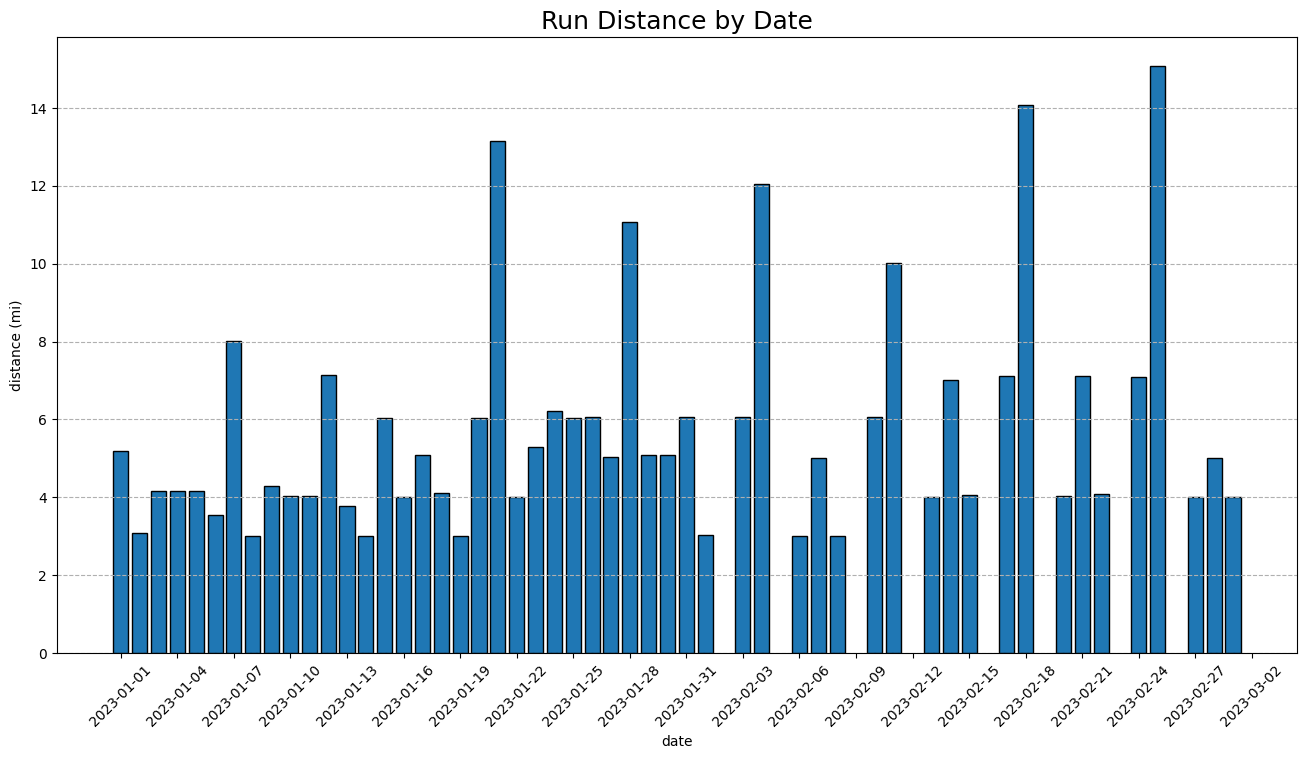

In [20]:
plt.figure(figsize=(16,8))
plt.bar(df23['run_date'], df23['distance_mi'], edgecolor='black')

plt.ylabel('distance (mi)')
plt.xlabel('date')

plt.xticks(rotation=45, ticks=calc_x_ticks())
plt.grid(True, axis='y', linestyle='dashed')
plt.title('Run Distance by Date', fontsize=18)

plt.show()

## Compare distance and pace

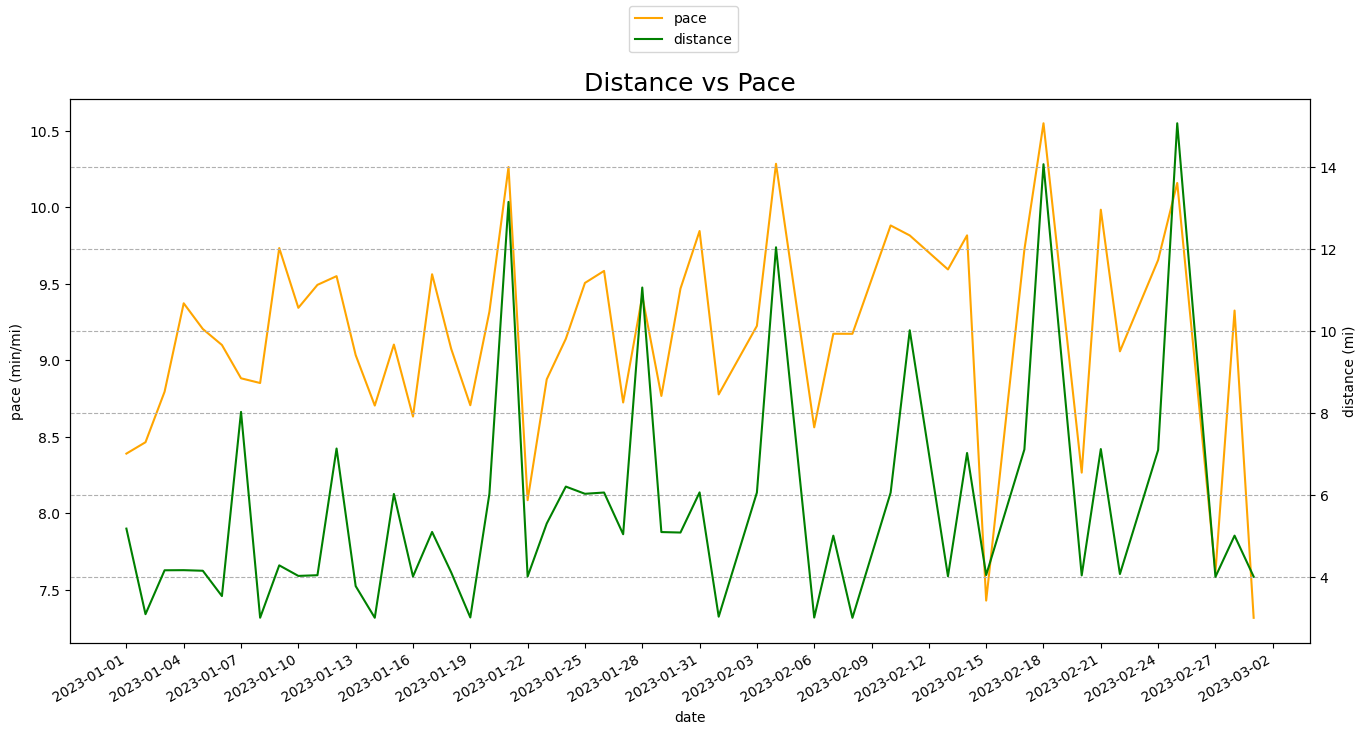

In [21]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(df23['run_date'], df23['pace_min_per_mile'], label='pace', color='orange')
ax2.plot(df23['run_date'], df23['distance_mi'], label='distance', color='green')

ax1.set_ylabel('pace (min/mi)')
ax1.set_xlabel('date')

ax2.set_ylabel('distance (mi)')

plt.xticks(ticks=calc_x_ticks())
plt.grid(True, axis='y', linestyle='dashed')
plt.title('Distance vs Pace', fontsize=18)
fig.autofmt_xdate()
fig.legend(loc='upper center')

plt.show()

## Run distance distribution
Runs longer than 8 miles were outliers.

75% of runs were less than ~6 miles.

Median run distance was ~5 miles.

25% of runs were less than ~4 miles.

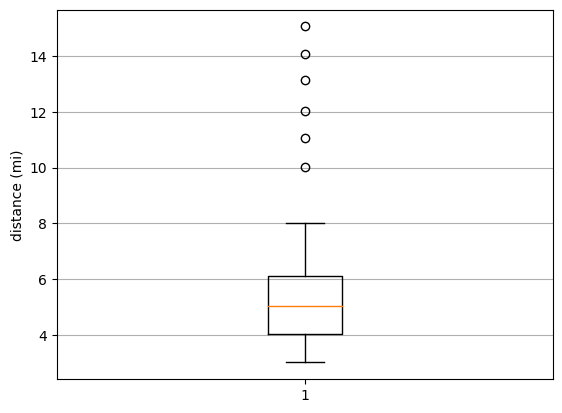

In [22]:
plt.boxplot(df23['distance_mi'])
plt.grid(True, axis='y')
plt.ylabel('distance (mi)')
plt.show()

/tmp/ipykernel_14743/2862234866.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare_fields['elapsed_time'] = df_compare_fields['elapsed_time'] / 60 # convert to minutes


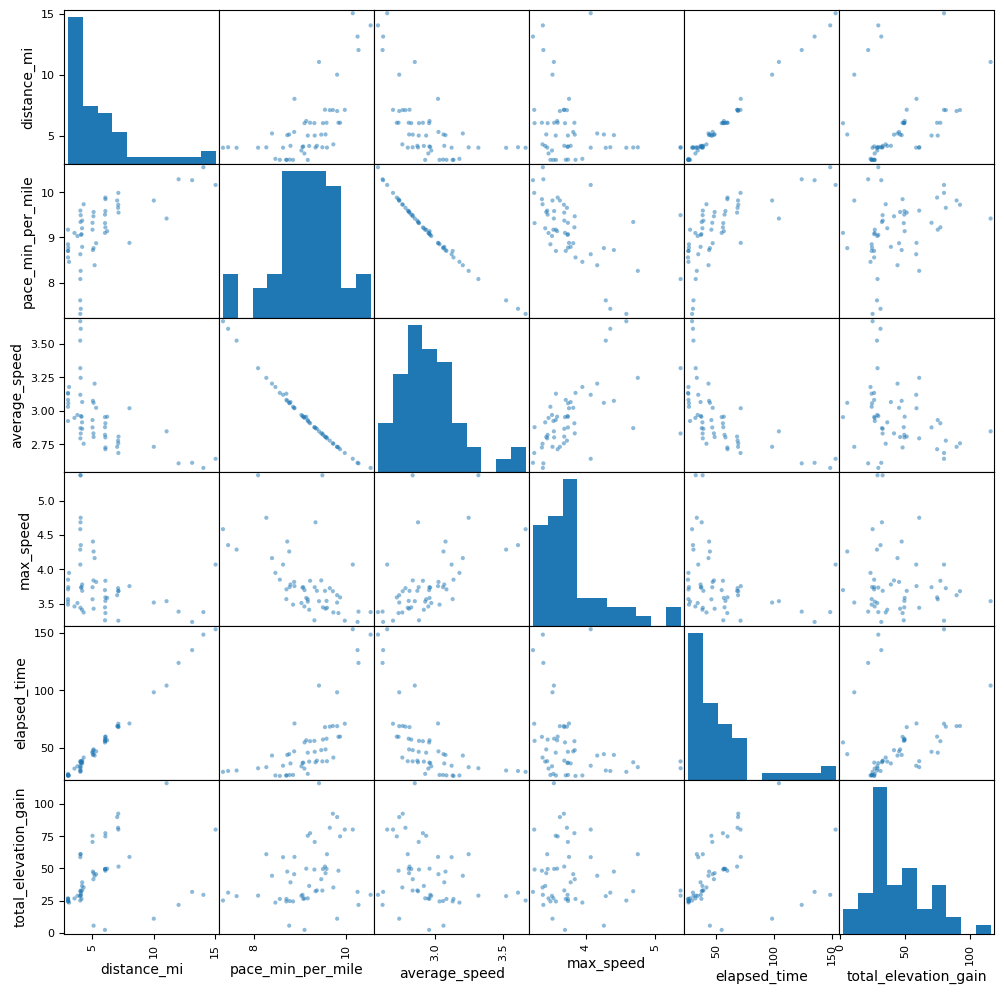

In [23]:
df_compare_fields = df23[[
    'distance_mi', 
    'pace_min_per_mile',
    'average_speed',
    'max_speed',
    'elapsed_time',
    'total_elevation_gain'
]]

df_compare_fields['elapsed_time'] = df_compare_fields['elapsed_time'] / 60 # convert to minutes

# plot scatter matrix
pd.plotting.scatter_matrix(df_compare_fields, figsize=(12, 12))
plt.show()

## 2023 summary stats

In [24]:
mean_dist = round(df23['distance_mi'].mean(), 2)
median_dist = round(df23['distance_mi'].median(), 2)
mean_pace = round(df23['pace_min_per_mile'].mean(), 2)
median_pace = round(df23['pace_min_per_mile'].median(), 2)
tot_dist = round(df23['distance_mi'].sum(), 2)
tot_run_time = round(df23['elapsed_time'].sum() / 60 / 60, 2)

print(f'mean distance:\t\t{mean_dist} mi')
print(f'median distance:\t{median_dist} mi')
print(f'mean pace:\t\t{mean_pace} min/mi')
print(f'median pace:\t\t{median_pace} min/mi')
print(f'total distance:\t\t{tot_dist} mi')
print(f'total run time:\t\t{tot_run_time} hrs')

mean distance:		5.73 mi
median distance:	5.03 mi
mean pace:		9.16 min/mi
median pace:		9.19 min/mi
total distance:		297.96 mi
total run time:		46.56 hrs
